In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import GridSearchCV



In [5]:
# Load the Bank Marketing dataset
bank= pd.read_csv('bank.csv',sep=';')



In [6]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [8]:
bank.shape

(4521, 17)

In [9]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [10]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [11]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [12]:
bank.duplicated().sum()

0

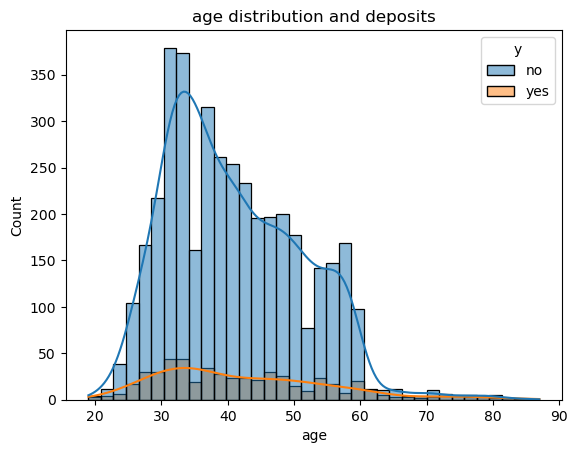

In [13]:
sns.histplot(x="age",data=bank,kde=True,hue="y")
plt.title("age distribution and deposits")
plt.show()

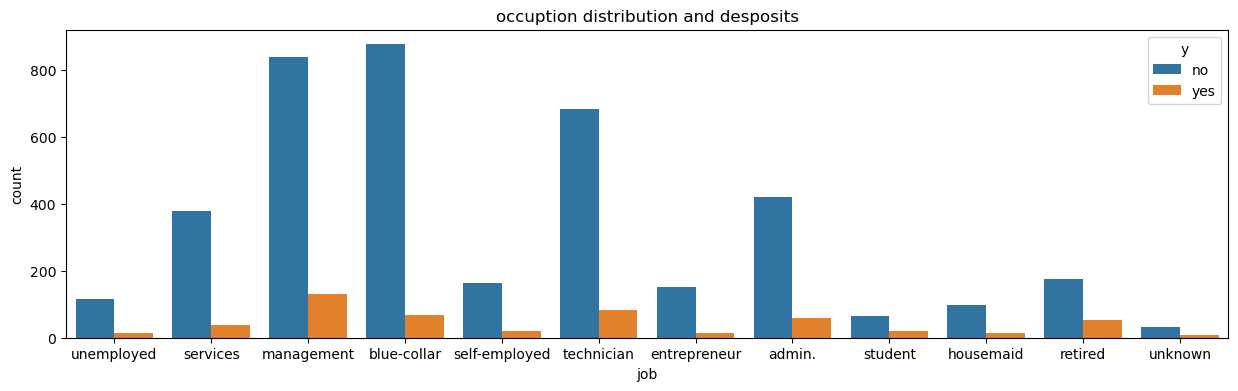

In [14]:
plt.figure(figsize=(15,4))
sns.countplot(x="job", data=bank,hue="y")
plt.title("occuption distribution and desposits")
plt.show()

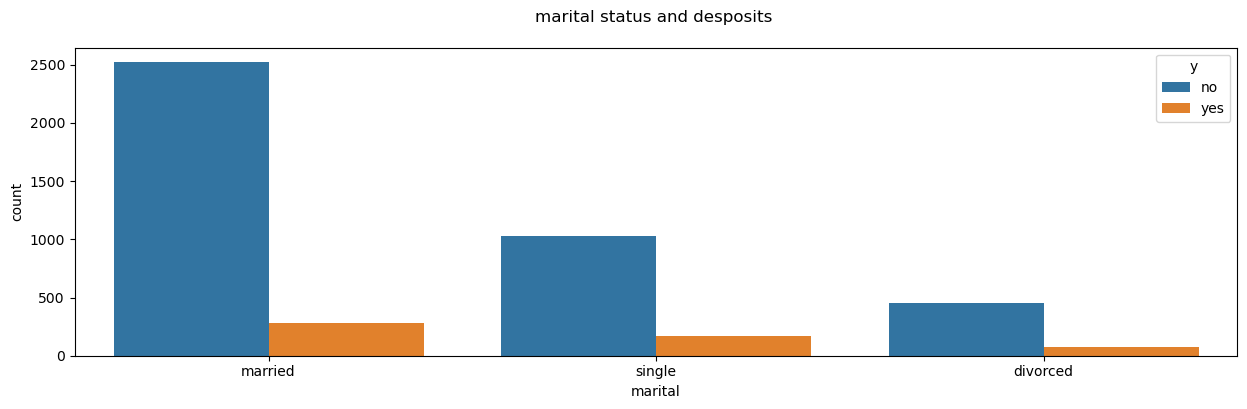

In [17]:
plt.figure(figsize=(15,4))
sns.countplot(x="marital", data=bank,hue="y")
plt.title("marital status and desposits \n")
plt.show()

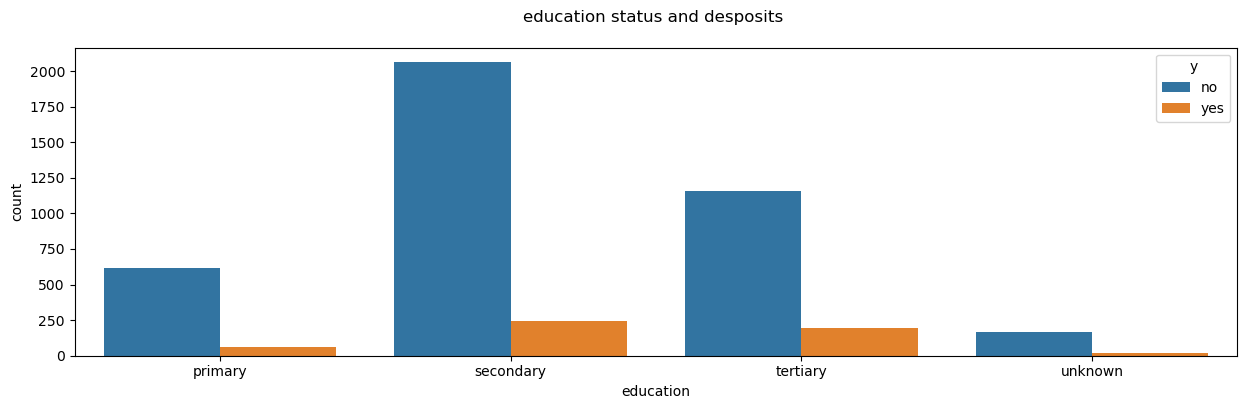

In [18]:
plt.figure(figsize=(15,4))
sns.countplot(x="education", data=bank,hue="y")
plt.title("education status and desposits \n")
plt.show()

In [19]:
bank.default.value_counts()

default
no     4445
yes      76
Name: count, dtype: int64

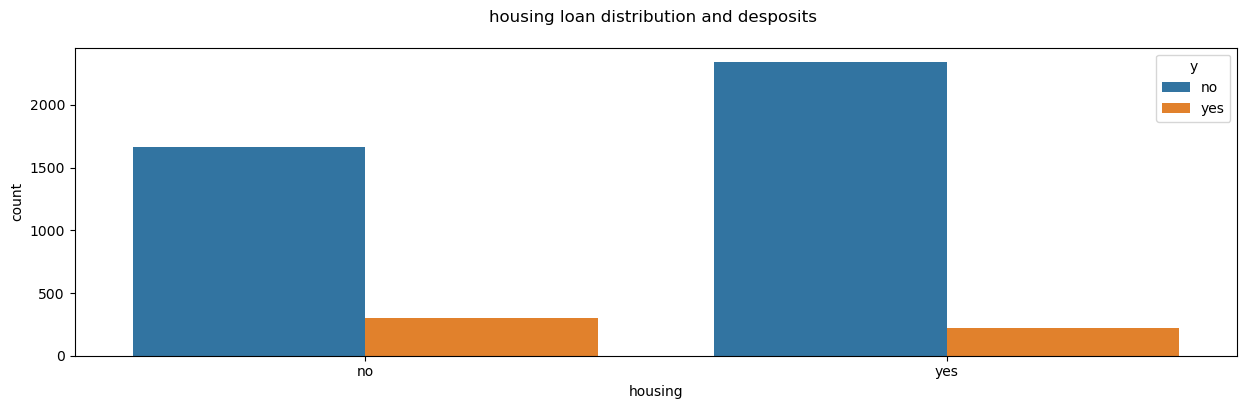

In [20]:
plt.figure(figsize=(15,4))
sns.countplot(x="housing", data=bank,hue="y")
plt.title("housing loan distribution and desposits \n")
plt.show()

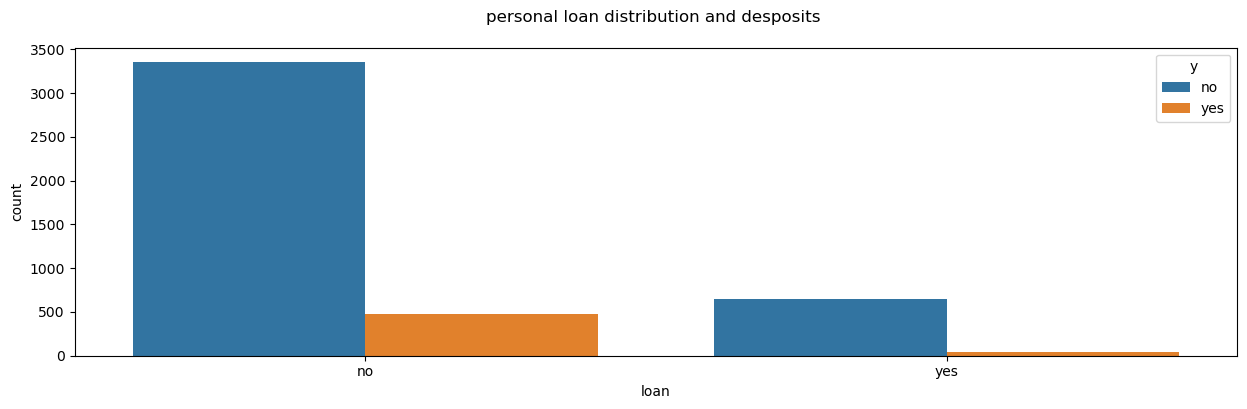

In [21]:
plt.figure(figsize=(15,4))
sns.countplot(x="loan", data=bank,hue="y")
plt.title("personal loan distribution and desposits \n")
plt.show()

In [23]:
cols=bank.select_dtypes("object").columns
cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [24]:
le=LabelEncoder()
bank[cols]=bank[cols].apply(le.fit_transform)

In [25]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


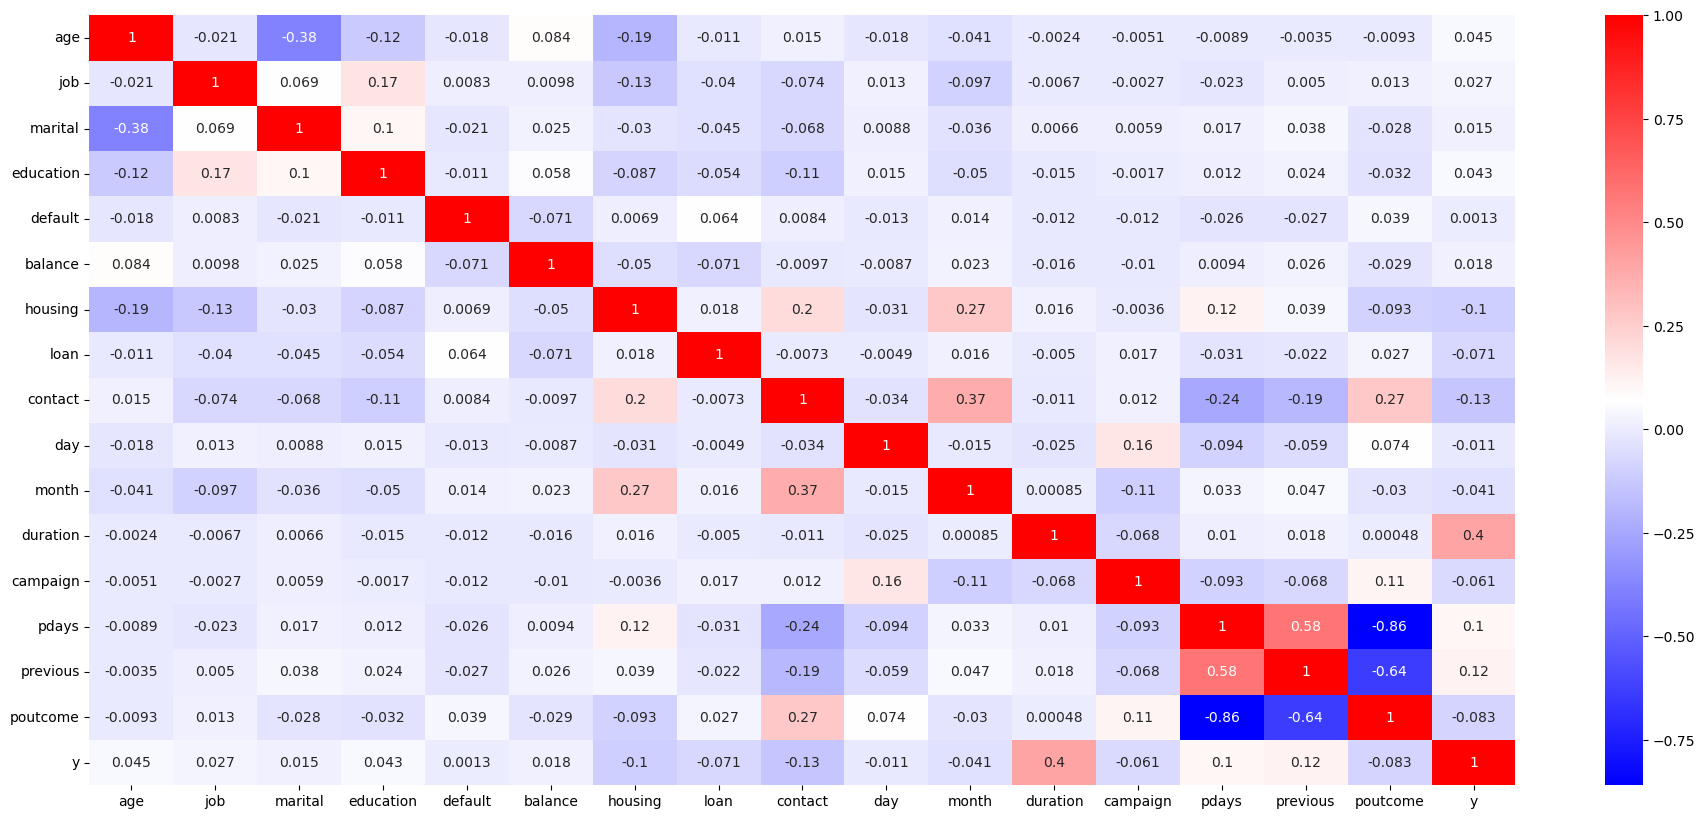

In [26]:
plt.figure(figsize=(23,10))
sns.heatmap(bank.corr(),cmap='bwr',annot=True)
plt.show()

In [27]:
x=bank.drop("y",axis=1)
y=bank.y

In [29]:
scaler=StandardScaler()
X_scaled=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [30]:

train_x,test_x,train_y,test_y=train_test_split(X_scaled,y, test_size=0.3)

In [31]:
decision_tree=DecisionTreeClassifier()
decision_tree.fit(train_x,train_y)

DecisionTreeClassifier()

In [33]:
print('train Score : {}'.format(decision_tree.score(train_x,train_y)))
print('test Score : {}'.format(decision_tree.score(test_x,test_y)))

train Score : 1.0
test Score : 0.8680913780397936


In [34]:
cross_val_score(decision_tree,train_x,train_y,cv=5).mean()

0.8530320755094287

In [35]:
ypred=decision_tree.predict(test_x)
print(classification_report(test_y,ypred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1209
           1       0.40      0.45      0.42       148

    accuracy                           0.87      1357
   macro avg       0.67      0.68      0.67      1357
weighted avg       0.87      0.87      0.87      1357



In [36]:
param_grid ={
    'max_depth':[3,5,7,10,None],
    'criterion':['gini','entropy'],
    'min_samples_leaf':[3,5,7,9,10,20]
}

In [38]:
gcsv=GridSearchCV(decision_tree,param_grid,cv=5,verbose=1)
gcsv.fit(train_x,train_y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [3, 5, 7, 9, 10, 20]},
             verbose=1)

In [39]:
gcsv.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 20}

In [40]:
gcsv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=20)

In [41]:
cross_val_score(gcsv.best_estimator_,train_x,train_y,cv=5).mean()

0.8903283540304356

In [43]:
clf=DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_leaf=3)
clf.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3)

In [44]:
print('train Score : {}'.format(clf.score(train_x,train_y)))
print('test Score : {}'.format(clf.score(test_x,test_y)))

train Score : 0.9099241466498104
test Score : 0.9027266028002948


In [45]:
pred_y=clf.predict(test_x)

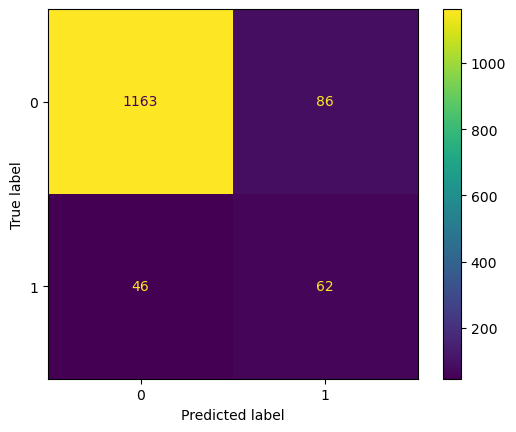

In [46]:
cm=confusion_matrix(pred_y,test_y)
ConfusionMatrixDisplay(cm,display_labels=clf.classes_).plot()
plt.show()

In [47]:
print(classification_report(pred_y,test_y))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1249
           1       0.42      0.57      0.48       108

    accuracy                           0.90      1357
   macro avg       0.69      0.75      0.72      1357
weighted avg       0.92      0.90      0.91      1357



In [48]:
accuracy=accuracy_score(test_y,pred_y)
print("the accuracy of decision tree classifier :{}".format(accuracy*100))

the accuracy of decision tree classifier :90.27266028002948


In [51]:
cross_val=cross_val_score(clf,test_x,test_y,cv=5).mean()
print("the cross validation accuracy scores decision tree:",cross_val*100)

the cross validation accuracy scores decision tree: 88.94806815715216
